<a href="https://colab.research.google.com/github/mmb405/Machine-Learning/blob/main/Biete%2C_Michelle_ML_Final_Project__Identifying_Abnormal_Gene_Expression_%26_Potential_Therapeutics_in_Veterans_with_PTSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Methods & Materials:

Dataset:
This dataset consisted of 94 U.S. Marines who gave peripheral blood samples 1-month prior to their deployment to a combat zone and 3-months post-deployment (Breen et al., 2015). During these two time points, they were also assessed for PTSD; none were diagnosed with PTSD prior to deployment (Breen et al., 2015). After deployment, 47 marines were diagnosed with PTSD (Breen et al., 2015). The other 47 Marines were used to control combat exposure, age, and ethnicity (Breen et al., 2015). The blood samples underwent high throughput RNA-sequencing using the Illumina HiSeq 2000 (Breen et al., 2015). The four classification groups used for this dataset were grouped as follows: "Pre-Control" was the label used to describe the RNA-sequencing results of the blood samples collected 1-month prior to deployment in individuals that weren't diagnosed with PTSD post-deployment, "PTSD Risk" was used to label the results blood samples collected 1-month prior to deployment in individuals that were diagnosed with PTSD post-deployment, "Post-Control" was used to label the results of the blood samples collected 3-months post-deployment in individuals that didn't develop PTSD, and "PTSD" was used to label the results of the blood samples collected 3-months post-deployment in individuals that developed PTSD (Breen et al., 2015). The raw dataset used in this analysis can be found in the Geo Database in Series GSE64813. In order to annotate this dataset, the condition 'PTSD', 'PTSD Risk', 'Pre-Control', and 'Post-Control' were added for each sample and used this dataset in the analysis, which can be can be found on Harvard Dataverse using the following link: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi%3A10.7910%2FDVN%2FP8ZOMR&version=DRAFT

Exploratory Analysis:
A PCA was generated prior to classification and feature selection. T-tests were also run to determine if there was a significant difference (p-value < 0.05 and FC> 1) in gene expression between the "Pre-Control" vs. "PTSD Risk" and the "PTSD" vs. "Post-Control." The genes filtered from this analysis were then used to compare these two groups to see if there were any significant differences in gene expression in the risk and PTSD-diagnosed individuals compared to their controls.

Data Classification & Dimensionality Reduction:
LazyPredict was used to choose an optimal classification model to determine the features that were significant. First, I ran Lazy Predict to choose the optimal classification mode to determine which features are most significant in accurately classifying the samples into groups. Autoencoders were then used to reduce the dimensionality of the dataset to provide a PCA with more variance explained.  

Gene Differentiation & Drug Repurposing:
T-tests were run for the entire dataset to compare the PTSD risk and the PTSD samples to their respective controls. Genes were considered significant if they had a p-value<0.05 and a fold change greater than 1. The top 10 genes with the lowest p-value and greatest fold change were then identified to see what diseases they were associated with using NeDRex and Cytoscape (Sadegh et al., 2022; Shannon et al., 2003).


#Data

In [12]:
#import pandas
import pandas as pd
import numpy as np
import scipy as scipy
!pip install researchpy
import researchpy as rp
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
#load datasets
df_all = pd.read_table('https://raw.githubusercontent.com/mmb405/Machine-Learning/ab95df5b4252a3893993ae88ceeceebfe852fae7/PTSD%20Dataset%20Condition%20Annotated%20Words.txt',sep='\t',header=[0,1]) 

In [14]:
Genes = df_all['GeneSymbols']
len(Genes)
#10,184 genes in dataset

10184

In [15]:
df_all
#189 samples
#94 individuals 


,GeneSymbols,Sample_1_1,Sample_1_3,Sample_2_1,Sample_2_3,Sample_3_1,Sample_3_3,Sample_4_1,Sample_4_3,Sample_5_1,...,Sample_90_1,Sample_90_3,Sample_91_1,Sample_91_3,Sample_92_1,Sample_92_3,Sample_93_1,Sample_93_3,Sample_94_1,Sample_94_3
,Condition,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,...,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control
0,A1BG,1.975361,1.611203,1.866363,2.490282,1.609809,1.863901,1.715980,1.495542,2.570589,...,2.391051,2.375044,1.725939,2.429608,1.419594,1.709946,2.232260,2.531731,2.501152,2.423590
1,AAAS,4.335821,4.303930,4.399203,4.484835,4.387146,4.397046,4.378945,4.248958,4.529135,...,4.649680,4.598025,4.335874,4.605050,4.414963,4.606384,4.417615,4.542344,4.269560,4.369076
2,AACS,3.308096,2.804740,3.171439,3.038533,3.150784,3.046640,2.890478,3.149423,3.080179,...,3.038000,3.138152,2.924583,2.978592,3.232224,3.294908,2.939129,3.130827,3.136834,2.871049
3,AAGAB,4.904497,5.121663,5.120645,4.973896,5.028497,4.916886,5.082552,5.070544,5.061336,...,5.002741,4.811053,5.018720,4.945425,4.968136,4.914174,5.034286,4.938756,4.986288,4.894896
4,AAK1,5.861860,6.041117,6.490728,6.308471,6.137885,6.621906,5.897310,6.009867,6.194696,...,6.077346,6.153252,5.968069,6.062908,6.273317,6.531344,6.160095,6.511424,5.810802,5.922635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10179,ZXDA,3.299457,2.935985,3.535682,3.529615,3.177337,3.316616,3.156552,3.071654,2.467496,...,3.099588,3.379160,3.186619,2.803191,2.773231,2.950600,3.352740,3.224188,2.754645,2.798380
10180,ZXDB,3.523705,3.472628,4.080087,3.906226,3.749084,3.913074,3.935425,3.613054,3.815146,...,3.908787,4.008641,3.600408,3.581256,3.696434,3.839491,3.639130,3.673654,3.629736,3.487720
10181,ZYG11B,5.566637,5.583258,5.520237,5.510976,5.888865,5.960010,5.598856,5.832612,5.639116,...,5.488826,5.714181,5.667224,5.355795,5.476267,5.633888,5.617023,5.335603,6.048264,5.807005


In [16]:
PTSDRisk=df_all.columns.get_level_values(1)=='PTSD Risk'
PTSDRisk= pd.DataFrame(PTSDRisk, columns=['A'])
PTSDRisk
count = PTSDRisk['A'].sum()
count
#Number of PTSD Risk Samples

47

In [17]:
PTSD=df_all.columns.get_level_values(1)=='PTSD'
PTSD= pd.DataFrame(PTSDRisk, columns=['A'])
count = PTSD['A'].sum()
count
#Number of PTSD Samples

47

In [18]:
PreControl=df_all.columns.get_level_values(1)=='Pre-Control'
PreControl= pd.DataFrame(PreControl, columns=['A'])
count = PreControl['A'].sum()
count
#Number of Pre-Control Samples

47

In [19]:
PostControl=df_all.columns.get_level_values(1)=='Post-Control'
PostControl= pd.DataFrame(PostControl, columns=['A'])
count = PostControl['A'].sum()
count
#Number of PostControl Samples

47

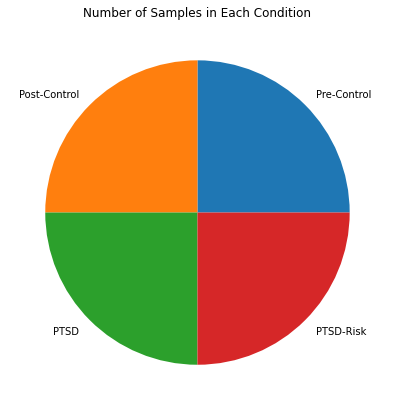

In [20]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
Condition = ['Pre-Control', 'Post-Control', 'PTSD',
        'PTSD-Risk']
 
data = [47,47,47,47]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Condition)
plt.title("Number of Samples in Each Condition")
# show plot
plt.show()

#Exploratory Analysis: PTSD vs. Post-Control 
Used in presentation
Post Deployment Samples: PTSD Diagnosed Patient RNA-Seq (PTSD) vs. Control RNA-Seq (Post-Control) FC>1

In [21]:
#import pandas
import pandas as pd
import numpy as np
import scipy as scipy
!pip install researchpy
import researchpy as rp
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
#load datasets
df_all = pd.read_table('https://raw.githubusercontent.com/mmb405/Machine-Learning/ab95df5b4252a3893993ae88ceeceebfe852fae7/PTSD%20Dataset%20Condition%20Annotated%20Words.txt',sep='\t',header=[0,1]) 

In [23]:
#get the index rows populated with Gene IDs
geneID = df_all.GeneSymbols.iloc[:,0:] 
df_all['ID'] = geneID
df_all.index = df_all.ID
df_all = df_all.drop(columns = ['GeneSymbols', 'ID'])

#check data
df_all

,Sample_1_1,Sample_1_3,Sample_2_1,Sample_2_3,Sample_3_1,Sample_3_3,Sample_4_1,Sample_4_3,Sample_5_1,Sample_5_3,...,Sample_90_1,Sample_90_3,Sample_91_1,Sample_91_3,Sample_92_1,Sample_92_3,Sample_93_1,Sample_93_3,Sample_94_1,Sample_94_3
,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,...,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.975361,1.611203,1.866363,2.490282,1.609809,1.863901,1.715980,1.495542,2.570589,1.718896,...,2.391051,2.375044,1.725939,2.429608,1.419594,1.709946,2.232260,2.531731,2.501152,2.423590
AAAS,4.335821,4.303930,4.399203,4.484835,4.387146,4.397046,4.378945,4.248958,4.529135,4.249182,...,4.649680,4.598025,4.335874,4.605050,4.414963,4.606384,4.417615,4.542344,4.269560,4.369076
AACS,3.308096,2.804740,3.171439,3.038533,3.150784,3.046640,2.890478,3.149423,3.080179,3.319669,...,3.038000,3.138152,2.924583,2.978592,3.232224,3.294908,2.939129,3.130827,3.136834,2.871049
AAGAB,4.904497,5.121663,5.120645,4.973896,5.028497,4.916886,5.082552,5.070544,5.061336,4.870154,...,5.002741,4.811053,5.018720,4.945425,4.968136,4.914174,5.034286,4.938756,4.986288,4.894896
AAK1,5.861860,6.041117,6.490728,6.308471,6.137885,6.621906,5.897310,6.009867,6.194696,6.279308,...,6.077346,6.153252,5.968069,6.062908,6.273317,6.531344,6.160095,6.511424,5.810802,5.922635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDA,3.299457,2.935985,3.535682,3.529615,3.177337,3.316616,3.156552,3.071654,2.467496,2.974959,...,3.099588,3.379160,3.186619,2.803191,2.773231,2.950600,3.352740,3.224188,2.754645,2.798380
ZXDB,3.523705,3.472628,4.080087,3.906226,3.749084,3.913074,3.935425,3.613054,3.815146,3.703915,...,3.908787,4.008641,3.600408,3.581256,3.696434,3.839491,3.639130,3.673654,3.629736,3.487720


In [24]:
#name your multi index column names
df_all.columns.names = ['Sample', 'Type']
df_all.head()

Sample,Sample_1_1,Sample_1_3,Sample_2_1,Sample_2_3,Sample_3_1,Sample_3_3,Sample_4_1,Sample_4_3,Sample_5_1,Sample_5_3,...,Sample_90_1,Sample_90_3,Sample_91_1,Sample_91_3,Sample_92_1,Sample_92_3,Sample_93_1,Sample_93_3,Sample_94_1,Sample_94_3
Type,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,...,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.975361,1.611203,1.866363,2.490282,1.609809,1.863901,1.715980,1.495542,2.570589,1.718896,...,2.391051,2.375044,1.725939,2.429608,1.419594,1.709946,2.232260,2.531731,2.501152,2.423590
AAAS,4.335821,4.303930,4.399203,4.484835,4.387146,4.397046,4.378945,4.248958,4.529135,4.249182,...,4.649680,4.598025,4.335874,4.605050,4.414963,4.606384,4.417615,4.542344,4.269560,4.369076
AACS,3.308096,2.804740,3.171439,3.038533,3.150784,3.046640,2.890478,3.149423,3.080179,3.319669,...,3.038000,3.138152,2.924583,2.978592,3.232224,3.294908,2.939129,3.130827,3.136834,2.871049
AAGAB,4.904497,5.121663,5.120645,4.973896,5.028497,4.916886,5.082552,5.070544,5.061336,4.870154,...,5.002741,4.811053,5.018720,4.945425,4.968136,4.914174,5.034286,4.938756,4.986288,4.894896
AAK1,5.861860,6.041117,6.490728,6.308471,6.137885,6.621906,5.897310,6.009867,6.194696,6.279308,...,6.077346,6.153252,5.968069,6.062908,6.273317,6.531344,6.160095,6.511424,5.810802,5.922635


In [25]:
#get samples that are PTSD or PTSD Risk:
df_ptsd1 = df_ptsd = df_all.iloc[:, (df_all.columns.get_level_values(1)=='PTSD') | (df_all.columns.get_level_values(1)=='Post-Control')]
df_ptsd1.head()

Sample,Sample_1_3,Sample_2_3,Sample_3_3,Sample_4_3,Sample_5_3,Sample_6_3,Sample_7_3,Sample_8_3,Sample_9_3,Sample_10_3,...,Sample_85_3,Sample_86_3,Sample_87_3,Sample_88_3,Sample_89_3,Sample_90_3,Sample_91_3,Sample_92_3,Sample_93_3,Sample_94_3
Type,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,...,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.611203,2.490282,1.863901,1.495542,1.718896,1.512798,2.199069,1.947891,1.297105,1.862869,...,1.973411,1.902471,1.227955,2.418189,1.405167,2.375044,2.429608,1.709946,2.531731,2.423590
AAAS,4.303930,4.484835,4.397046,4.248958,4.249182,4.260032,4.680790,4.499020,4.159379,4.323272,...,4.524635,4.326429,4.088381,4.523500,4.468812,4.598025,4.605050,4.606384,4.542344,4.369076
AACS,2.804740,3.038533,3.046640,3.149423,3.319669,3.265439,3.154550,3.071431,2.472955,2.920480,...,2.936075,2.829050,2.797064,3.433078,3.149550,3.138152,2.978592,3.294908,3.130827,2.871049
AAGAB,5.121663,4.973896,4.916886,5.070544,4.870154,5.080482,5.116020,4.880664,5.019301,5.044619,...,4.915668,5.253832,4.571013,4.947206,5.040071,4.811053,4.945425,4.914174,4.938756,4.894896
AAK1,6.041117,6.308471,6.621906,6.009867,6.279308,6.046864,6.511801,6.323736,6.101276,5.828397,...,5.976698,6.108050,5.949166,6.081312,6.090078,6.153252,6.062908,6.531344,6.511424,5.922635


In [26]:
# perform T-test and FC calculation for all rows PTSD vs Post-Control

# create a new dataframe with PTSD and PTSD Risk columns only (lelve = Type)
Results_df1 = df_ptsd1

#get p-value results
PTSD_pval = scipy.stats.ttest_ind(df_all.iloc[:, df_all.columns.get_level_values(1)=='PTSD'],
                                     df_all.iloc[:, df_all.columns.get_level_values(1)=='Post-Control'],
                                     equal_var = True, axis = 1).pvalue

#calculate FC by dividing mean
PTSD_fc = np.mean(df_all.iloc[:, df_all.columns.get_level_values(1)=='PTSD'].T)/np.mean(df_all.iloc[:, df_all.columns.get_level_values(1)=='Post-Control'].T)

#add results to dataframe
Results_df1['p-value'] = PTSD_pval
Results_df1['FC'] = PTSD_fc

#check result
Results_df1.head()

Sample,Sample_1_3,Sample_2_3,Sample_3_3,Sample_4_3,Sample_5_3,Sample_6_3,Sample_7_3,Sample_8_3,Sample_9_3,Sample_10_3,...,Sample_87_3,Sample_88_3,Sample_89_3,Sample_90_3,Sample_91_3,Sample_92_3,Sample_93_3,Sample_94_3,p-value,FC
Type,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,...,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,,
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.611203,2.490282,1.863901,1.495542,1.718896,1.512798,2.199069,1.947891,1.297105,1.862869,...,1.227955,2.418189,1.405167,2.375044,2.429608,1.709946,2.531731,2.423590,0.383714,0.959119
AAAS,4.303930,4.484835,4.397046,4.248958,4.249182,4.260032,4.680790,4.499020,4.159379,4.323272,...,4.088381,4.523500,4.468812,4.598025,4.605050,4.606384,4.542344,4.369076,0.276670,0.992026
AACS,2.804740,3.038533,3.046640,3.149423,3.319669,3.265439,3.154550,3.071431,2.472955,2.920480,...,2.797064,3.433078,3.149550,3.138152,2.978592,3.294908,3.130827,2.871049,0.392790,1.014501
AAGAB,5.121663,4.973896,4.916886,5.070544,4.870154,5.080482,5.116020,4.880664,5.019301,5.044619,...,4.571013,4.947206,5.040071,4.811053,4.945425,4.914174,4.938756,4.894896,0.316179,1.005110
AAK1,6.041117,6.308471,6.621906,6.009867,6.279308,6.046864,6.511801,6.323736,6.101276,5.828397,...,5.949166,6.081312,6.090078,6.153252,6.062908,6.531344,6.511424,5.922635,0.862101,1.001108


In [27]:
#S100β, NSE, and GFAP
result3 = Results_df1.loc['S100B']
#result2 = Results_df1.loc['NSE']- Not in dataset
#result1 = Results_df1.loc['GFAP']- Not in dataset
#print(result1)
#print(result2)
print(result3)

Sample       Type        
Sample_1_3   PTSD           -1.140118
Sample_2_3   PTSD            1.157438
Sample_3_3   PTSD            0.994688
Sample_4_3   PTSD            1.067208
Sample_5_3   PTSD            1.458245
                               ...   
Sample_92_3  Post-Control    1.073536
Sample_93_3  Post-Control    2.443887
Sample_94_3  Post-Control    1.224025
p-value                      0.728646
FC                           0.938793
Name: S100B, Length: 96, dtype: float64


In [68]:
#filter results by p-vl < 0.05 and FC > 1
PTSD_PostControl_SigTTestFC= Results_df1[(Results_df1['p-value'] < 0.05) & (Results_df1['FC'] > 1)]

In [29]:
#Select Genes with lowest p-value
PTSD_PostControl_SigTTestFC.sort_values(by = 'p-value')

Sample,Sample_1_3,Sample_2_3,Sample_3_3,Sample_4_3,Sample_5_3,Sample_6_3,Sample_7_3,Sample_8_3,Sample_9_3,Sample_10_3,...,Sample_87_3,Sample_88_3,Sample_89_3,Sample_90_3,Sample_91_3,Sample_92_3,Sample_93_3,Sample_94_3,p-value,FC
Type,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,...,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,,
ID,,,,,,,,,,,,,,,,,,,,,
SLC35B3,4.584168,4.538406,4.468042,4.365794,4.559921,4.449287,4.536851,4.626859,4.631448,4.585335,...,4.561660,4.349221,4.548405,4.159847,4.124022,4.365152,4.542344,4.452633,0.002386,1.017240
NCKAP1L,8.228388,7.990168,8.092720,8.031852,7.794210,7.875221,8.137625,7.883944,8.057096,8.029376,...,7.796815,8.073612,8.033622,7.851796,7.733119,7.811528,7.889283,7.925836,0.003264,1.009258
C2orf49,3.147748,3.365410,3.497188,3.360353,3.263557,3.040045,3.295413,3.213312,3.265594,3.121444,...,2.874647,3.152758,3.140644,3.128404,2.835735,3.026350,2.787646,2.881138,0.004364,1.025334
MBD5,3.844775,3.900782,3.928261,3.874563,3.926738,3.466603,3.778708,3.871878,3.873135,3.713831,...,3.501789,3.779095,3.721133,3.772456,3.662118,3.940846,3.795272,3.494308,0.004674,1.026677
IFIT5,6.479979,5.572191,5.947643,6.373467,5.509978,5.484486,5.209987,5.326954,5.495444,5.392459,...,5.261559,5.776179,5.638935,5.004650,5.632323,5.149188,5.038521,5.324486,0.004940,1.045391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,2.646478,2.369358,2.328112,1.669872,1.103814,2.001684,2.166828,1.217281,1.261036,2.393384,...,1.179861,2.082728,1.650744,1.523746,1.478518,1.073536,1.654215,1.835172,0.048737,1.145805
ARAP2,6.832192,6.909957,7.123146,6.633873,6.531776,6.670888,7.053748,6.694973,6.634534,6.300274,...,6.119789,6.739219,6.746668,6.679138,6.526239,6.871936,6.793687,6.382899,0.048785,1.014931


In [30]:
#Select Genes with Highest FC
PTSD_PostControl_SigTTestFC.sort_values(by = 'FC')

Sample,Sample_1_3,Sample_2_3,Sample_3_3,Sample_4_3,Sample_5_3,Sample_6_3,Sample_7_3,Sample_8_3,Sample_9_3,Sample_10_3,...,Sample_87_3,Sample_88_3,Sample_89_3,Sample_90_3,Sample_91_3,Sample_92_3,Sample_93_3,Sample_94_3,p-value,FC
Type,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,...,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,,
ID,,,,,,,,,,,,,,,,,,,,,
SMEK2,7.041448,6.928803,7.013500,7.014782,7.086880,7.042409,6.884408,7.055169,7.130620,6.974951,...,7.106584,6.811646,7.055256,6.956223,6.821249,6.840803,6.811973,6.842613,0.046657,1.005486
ATP5F1,6.768775,6.705016,6.627344,6.570101,6.575232,6.594902,6.675429,6.563186,6.597048,6.676698,...,6.320279,6.514778,6.678313,6.578021,6.622642,6.283762,6.522188,6.703139,0.034564,1.006972
FAM199X,6.107176,5.997679,6.174730,6.023701,6.229963,5.947216,6.040742,6.111966,6.214054,6.092685,...,6.000256,6.052676,6.078467,6.007977,5.987671,6.194634,6.084375,5.857699,0.019013,1.007226
ATG12,5.680061,5.567044,5.802730,5.777887,5.668084,5.611626,5.585681,5.667314,5.795671,5.641701,...,5.660257,5.590772,5.674848,5.539462,5.713370,5.604532,5.647910,5.545161,0.026193,1.007642
EFR3A,6.627625,6.496161,6.672384,6.738236,6.703538,6.431361,6.522192,6.579466,6.539868,6.721587,...,6.329952,6.455491,6.665953,6.461536,6.421144,6.456642,6.491219,6.637700,0.035450,1.007908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLEC12B,2.841735,3.125121,3.162474,2.698901,2.436658,4.511282,3.799885,2.444196,4.889470,3.411762,...,2.038685,4.121848,4.677159,4.243505,3.411731,3.547182,4.203320,3.467775,0.014841,1.121197
RSAD2,7.041448,4.141370,5.298225,6.777547,3.524547,4.042146,3.578806,3.601270,3.319199,3.788868,...,3.233856,5.746687,4.891390,3.727964,4.651493,3.809788,3.795272,3.947452,0.023900,1.128761


#Exploratory Analysis: PTSD-Risk vs. Pre-Control FC>1
Used in Presentation
Pre-Deployment (1 month prior to deployment) Samples: Patient RNA-Seq Analysis that was diagnosed with PTSD after deployment (PTSD-Risk) vs. Control RNA-Seq (Pre-Control)

In [31]:
#import pandas
import pandas as pd
import numpy as np
import scipy as scipy
!pip install researchpy
import researchpy as rp
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
#load datasets
df_all = pd.read_table('https://raw.githubusercontent.com/mmb405/Machine-Learning/ab95df5b4252a3893993ae88ceeceebfe852fae7/PTSD%20Dataset%20Condition%20Annotated%20Words.txt',sep='\t',header=[0,1]) 

In [33]:
#get the index rows populated with Gene IDs
geneID = df_all.GeneSymbols.iloc[:,0:] 
df_all['ID'] = geneID
df_all.index = df_all.ID
df_all = df_all.drop(columns = ['GeneSymbols', 'ID'])

#check data
df_all.head()

,Sample_1_1,Sample_1_3,Sample_2_1,Sample_2_3,Sample_3_1,Sample_3_3,Sample_4_1,Sample_4_3,Sample_5_1,Sample_5_3,...,Sample_90_1,Sample_90_3,Sample_91_1,Sample_91_3,Sample_92_1,Sample_92_3,Sample_93_1,Sample_93_3,Sample_94_1,Sample_94_3
,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,...,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.975361,1.611203,1.866363,2.490282,1.609809,1.863901,1.715980,1.495542,2.570589,1.718896,...,2.391051,2.375044,1.725939,2.429608,1.419594,1.709946,2.232260,2.531731,2.501152,2.423590
AAAS,4.335821,4.303930,4.399203,4.484835,4.387146,4.397046,4.378945,4.248958,4.529135,4.249182,...,4.649680,4.598025,4.335874,4.605050,4.414963,4.606384,4.417615,4.542344,4.269560,4.369076
AACS,3.308096,2.804740,3.171439,3.038533,3.150784,3.046640,2.890478,3.149423,3.080179,3.319669,...,3.038000,3.138152,2.924583,2.978592,3.232224,3.294908,2.939129,3.130827,3.136834,2.871049
AAGAB,4.904497,5.121663,5.120645,4.973896,5.028497,4.916886,5.082552,5.070544,5.061336,4.870154,...,5.002741,4.811053,5.018720,4.945425,4.968136,4.914174,5.034286,4.938756,4.986288,4.894896
AAK1,5.861860,6.041117,6.490728,6.308471,6.137885,6.621906,5.897310,6.009867,6.194696,6.279308,...,6.077346,6.153252,5.968069,6.062908,6.273317,6.531344,6.160095,6.511424,5.810802,5.922635


In [34]:
#name your multi index column names
df_all.columns.names = ['Sample', 'Type']
df_all.head()

Sample,Sample_1_1,Sample_1_3,Sample_2_1,Sample_2_3,Sample_3_1,Sample_3_3,Sample_4_1,Sample_4_3,Sample_5_1,Sample_5_3,...,Sample_90_1,Sample_90_3,Sample_91_1,Sample_91_3,Sample_92_1,Sample_92_3,Sample_93_1,Sample_93_3,Sample_94_1,Sample_94_3
Type,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,...,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.975361,1.611203,1.866363,2.490282,1.609809,1.863901,1.715980,1.495542,2.570589,1.718896,...,2.391051,2.375044,1.725939,2.429608,1.419594,1.709946,2.232260,2.531731,2.501152,2.423590
AAAS,4.335821,4.303930,4.399203,4.484835,4.387146,4.397046,4.378945,4.248958,4.529135,4.249182,...,4.649680,4.598025,4.335874,4.605050,4.414963,4.606384,4.417615,4.542344,4.269560,4.369076
AACS,3.308096,2.804740,3.171439,3.038533,3.150784,3.046640,2.890478,3.149423,3.080179,3.319669,...,3.038000,3.138152,2.924583,2.978592,3.232224,3.294908,2.939129,3.130827,3.136834,2.871049
AAGAB,4.904497,5.121663,5.120645,4.973896,5.028497,4.916886,5.082552,5.070544,5.061336,4.870154,...,5.002741,4.811053,5.018720,4.945425,4.968136,4.914174,5.034286,4.938756,4.986288,4.894896
AAK1,5.861860,6.041117,6.490728,6.308471,6.137885,6.621906,5.897310,6.009867,6.194696,6.279308,...,6.077346,6.153252,5.968069,6.062908,6.273317,6.531344,6.160095,6.511424,5.810802,5.922635


In [35]:
#get samples that are PTSD or PTSD Risk:
df_ptsd2 = df_ptsd = df_all.iloc[:, (df_all.columns.get_level_values(1)=='PTSD Risk') | (df_all.columns.get_level_values(1)=='Pre-Control')]
df_ptsd2

Sample,Sample_1_1,Sample_2_1,Sample_3_1,Sample_4_1,Sample_5_1,Sample_6_1,Sample_7_1,Sample_8_1,Sample_9_1,Sample_10_1,...,Sample_85_1,Sample_86_1,Sample_87_1,Sample_88_1,Sample_89_1,Sample_90_1,Sample_91_1,Sample_92_1,Sample_93_1,Sample_94_1
Type,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,...,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.975361,1.866363,1.609809,1.715980,2.570589,1.724641,2.027937,1.717481,1.513403,1.951567,...,1.760015,1.918579,1.699887,2.495425,1.212607,2.391051,1.725939,1.419594,2.232260,2.501152
AAAS,4.335821,4.399203,4.387146,4.378945,4.529135,4.521203,4.673809,4.422499,4.436376,4.080536,...,4.218286,4.451197,4.484372,4.647936,4.549383,4.649680,4.335874,4.414963,4.417615,4.269560
AACS,3.308096,3.171439,3.150784,2.890478,3.080179,3.003273,2.768932,2.943276,3.019654,2.794661,...,3.032594,3.056083,3.055824,3.069055,3.157681,3.038000,2.924583,3.232224,2.939129,3.136834
AAGAB,4.904497,5.120645,5.028497,5.082552,5.061336,5.032703,4.935500,5.004411,5.126810,5.038382,...,5.152941,5.280735,4.999137,4.849504,5.074585,5.002741,5.018720,4.968136,5.034286,4.986288
AAK1,5.861860,6.490728,6.137885,5.897310,6.194696,6.032070,6.299041,6.329512,6.394097,5.945359,...,5.854969,6.259780,6.074448,6.212442,5.989437,6.077346,5.968069,6.273317,6.160095,5.810802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDA,3.299457,3.535682,3.177337,3.156552,2.467496,2.394851,2.971353,3.609189,3.417738,3.103020,...,2.688029,3.242496,3.378786,3.464619,3.494178,3.099588,3.186619,2.773231,3.352740,2.754645
ZXDB,3.523705,4.080087,3.749084,3.935425,3.815146,3.603665,3.870881,4.140692,3.929238,3.735128,...,3.536026,4.053820,3.888805,4.184882,3.761186,3.908787,3.600408,3.696434,3.639130,3.629736


In [36]:
# perform T-test and FC calculation for all rows PTSD vs Post-Control

# create a new dataframe with PTSD and PTSD Risk columns only (lelve = Type)
Results_df = df_ptsd2

#get p-value results
PTSD_pval = scipy.stats.ttest_ind(df_all.iloc[:, df_all.columns.get_level_values(1)=='PTSD Risk'],
                                     df_all.iloc[:, df_all.columns.get_level_values(1)=='Pre-Control'],
                                     equal_var = True, axis = 1).pvalue

#calculate FC by dividing mean
PTSD_fc = np.mean(df_all.iloc[:, df_all.columns.get_level_values(1)=='PTSD Risk'].T)/np.mean(df_all.iloc[:, df_all.columns.get_level_values(1)=='Pre-Control'].T)

#add results to dataframe
Results_df['p-value'] = PTSD_pval
Results_df['FC'] = PTSD_fc

#check result
Results_df.head()

Sample,Sample_1_1,Sample_2_1,Sample_3_1,Sample_4_1,Sample_5_1,Sample_6_1,Sample_7_1,Sample_8_1,Sample_9_1,Sample_10_1,...,Sample_87_1,Sample_88_1,Sample_89_1,Sample_90_1,Sample_91_1,Sample_92_1,Sample_93_1,Sample_94_1,p-value,FC
Type,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,...,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,,
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.975361,1.866363,1.609809,1.715980,2.570589,1.724641,2.027937,1.717481,1.513403,1.951567,...,1.699887,2.495425,1.212607,2.391051,1.725939,1.419594,2.232260,2.501152,0.085970,0.933002
AAAS,4.335821,4.399203,4.387146,4.378945,4.529135,4.521203,4.673809,4.422499,4.436376,4.080536,...,4.484372,4.647936,4.549383,4.649680,4.335874,4.414963,4.417615,4.269560,0.339996,0.994032
AACS,3.308096,3.171439,3.150784,2.890478,3.080179,3.003273,2.768932,2.943276,3.019654,2.794661,...,3.055824,3.069055,3.157681,3.038000,2.924583,3.232224,2.939129,3.136834,0.770674,0.996035
AAGAB,4.904497,5.120645,5.028497,5.082552,5.061336,5.032703,4.935500,5.004411,5.126810,5.038382,...,4.999137,4.849504,5.074585,5.002741,5.018720,4.968136,5.034286,4.986288,0.023371,1.010391
AAK1,5.861860,6.490728,6.137885,5.897310,6.194696,6.032070,6.299041,6.329512,6.394097,5.945359,...,6.074448,6.212442,5.989437,6.077346,5.968069,6.273317,6.160095,5.810802,0.029763,0.986160


In [37]:
result3 = Results_df.loc['S100B']
#result2 = df_ptsd2.loc['NSE']-Not in dataset
#result1 = df_ptsd2.loc['GFAP']-Not in dataset
print(result3)

Sample       Type       
Sample_1_1   PTSD Risk     -2.757993
Sample_2_1   PTSD Risk      1.485056
Sample_3_1   PTSD Risk      1.583578
Sample_4_1   PTSD Risk      1.151481
Sample_5_1   PTSD Risk      1.699669
                              ...   
Sample_92_1  Pre-Control    1.119085
Sample_93_1  Pre-Control    2.269018
Sample_94_1  Pre-Control    1.183293
p-value                     0.831228
FC                          1.035435
Name: S100B, Length: 96, dtype: float64


In [80]:
#filter results by p-vl < 0.05 and FC > 1
PTSDRisk_PreControl_SigTTestFC=Results_df[(Results_df['p-value'] < 0.05) & (Results_df['FC'] > 1)]
PTSDRisk_PreControl_SigTTestFC

Sample,Sample_1_1,Sample_2_1,Sample_3_1,Sample_4_1,Sample_5_1,Sample_6_1,Sample_7_1,Sample_8_1,Sample_9_1,Sample_10_1,...,Sample_87_1,Sample_88_1,Sample_89_1,Sample_90_1,Sample_91_1,Sample_92_1,Sample_93_1,Sample_94_1,p-value,FC
Type,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,...,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,,
ID,,,,,,,,,,,,,,,,,,,,,
AAGAB,4.90,5.12,5.03,5.08,5.06,5.03,4.94,5.00,5.13,5.04,...,5.00,4.85,5.07,5.00,5.02,4.97,5.03,4.99,0.02,1.01
ACOT9,5.10,4.85,5.14,5.22,5.12,5.08,5.16,4.80,5.00,5.02,...,4.40,5.00,4.95,5.06,4.98,5.14,5.07,5.16,0.00,1.03
ADAP2,3.55,3.63,3.86,4.19,3.86,3.96,4.20,3.69,3.66,4.00,...,3.18,3.58,3.96,3.62,3.76,3.83,3.80,4.18,0.03,1.04
ADPRH,4.30,3.95,3.94,4.01,3.68,3.22,3.90,3.84,3.50,3.68,...,3.23,3.83,4.04,3.38,3.90,3.77,3.82,3.65,0.04,1.03
ADSL,5.20,5.28,5.03,5.19,5.15,5.09,5.17,5.19,5.10,5.09,...,5.01,5.19,5.24,5.13,4.96,4.83,4.91,5.08,0.02,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF485,1.77,2.01,1.95,1.80,2.02,1.59,1.61,2.09,1.87,1.63,...,1.50,2.06,1.43,2.39,1.58,1.77,1.72,0.87,0.02,1.08
ZNF557,3.45,3.59,3.63,3.47,3.13,3.38,3.78,3.52,3.76,3.50,...,3.51,3.56,3.44,3.42,3.31,3.48,3.34,3.29,0.03,1.02


In [39]:
#Select genes with smallest p-value
PTSDRisk_PreControl_SigTTestFC.sort_values(by = 'p-value')

Sample,Sample_1_1,Sample_2_1,Sample_3_1,Sample_4_1,Sample_5_1,Sample_6_1,Sample_7_1,Sample_8_1,Sample_9_1,Sample_10_1,...,Sample_87_1,Sample_88_1,Sample_89_1,Sample_90_1,Sample_91_1,Sample_92_1,Sample_93_1,Sample_94_1,p-value,FC
Type,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,...,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,,
ID,,,,,,,,,,,,,,,,,,,,,
RNFT1,5.135612,4.981482,4.906829,4.672391,4.661809,4.648989,4.938187,4.836165,4.595599,4.867971,...,4.661323,4.841533,4.782288,4.567996,4.768250,4.914458,4.784272,4.886856,0.000130,1.026357
KARS,6.658593,6.660695,6.499703,6.615063,6.333090,6.381486,6.419293,6.625563,6.539106,6.591895,...,6.410978,6.562020,6.675427,6.527354,6.536725,6.322781,6.374515,6.401507,0.000275,1.015292
CMPK2,4.310248,3.587418,4.205562,5.543799,2.731802,3.317943,3.111240,3.394807,3.503796,3.903986,...,3.174877,3.652500,4.071160,3.082258,4.122829,3.152856,3.427811,3.906990,0.000314,1.192031
IFI44L,5.635183,5.066985,5.353582,6.703474,3.656797,4.071444,3.813509,4.959749,4.249730,5.345457,...,4.228619,4.803743,5.584246,4.049193,4.587232,4.147282,4.062044,4.929879,0.000373,1.182131
IFI16,8.646829,8.066352,8.530175,8.724649,8.157475,8.412603,7.927579,8.385809,8.073550,8.569308,...,8.216671,8.185538,8.318847,8.182103,8.217944,8.313997,8.192299,8.468305,0.000385,1.027443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAT1,9.577565,8.782917,9.058642,9.276331,9.103161,9.238970,8.904325,8.974401,8.546631,9.496576,...,8.988256,8.773428,8.872378,8.679427,9.130391,8.782924,8.931894,9.254302,0.049406,1.014695
CECR1,7.629809,7.802583,7.832027,8.187384,7.614983,7.635499,8.268545,7.559130,7.445396,7.926047,...,7.567648,7.538998,7.888767,7.518724,7.744073,7.625878,7.559066,7.826133,0.049706,1.012743


In [40]:
#Select genes with largest fold change
PTSD_PostControl_SigTTestFC.sort_values(by = 'FC')

Sample,Sample_1_3,Sample_2_3,Sample_3_3,Sample_4_3,Sample_5_3,Sample_6_3,Sample_7_3,Sample_8_3,Sample_9_3,Sample_10_3,...,Sample_87_3,Sample_88_3,Sample_89_3,Sample_90_3,Sample_91_3,Sample_92_3,Sample_93_3,Sample_94_3,p-value,FC
Type,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,...,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,,
ID,,,,,,,,,,,,,,,,,,,,,
SMEK2,7.041448,6.928803,7.013500,7.014782,7.086880,7.042409,6.884408,7.055169,7.130620,6.974951,...,7.106584,6.811646,7.055256,6.956223,6.821249,6.840803,6.811973,6.842613,0.046657,1.005486
ATP5F1,6.768775,6.705016,6.627344,6.570101,6.575232,6.594902,6.675429,6.563186,6.597048,6.676698,...,6.320279,6.514778,6.678313,6.578021,6.622642,6.283762,6.522188,6.703139,0.034564,1.006972
FAM199X,6.107176,5.997679,6.174730,6.023701,6.229963,5.947216,6.040742,6.111966,6.214054,6.092685,...,6.000256,6.052676,6.078467,6.007977,5.987671,6.194634,6.084375,5.857699,0.019013,1.007226
ATG12,5.680061,5.567044,5.802730,5.777887,5.668084,5.611626,5.585681,5.667314,5.795671,5.641701,...,5.660257,5.590772,5.674848,5.539462,5.713370,5.604532,5.647910,5.545161,0.026193,1.007642
EFR3A,6.627625,6.496161,6.672384,6.738236,6.703538,6.431361,6.522192,6.579466,6.539868,6.721587,...,6.329952,6.455491,6.665953,6.461536,6.421144,6.456642,6.491219,6.637700,0.035450,1.007908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLEC12B,2.841735,3.125121,3.162474,2.698901,2.436658,4.511282,3.799885,2.444196,4.889470,3.411762,...,2.038685,4.121848,4.677159,4.243505,3.411731,3.547182,4.203320,3.467775,0.014841,1.121197
RSAD2,7.041448,4.141370,5.298225,6.777547,3.524547,4.042146,3.578806,3.601270,3.319199,3.788868,...,3.233856,5.746687,4.891390,3.727964,4.651493,3.809788,3.795272,3.947452,0.023900,1.128761


#Classification

In [41]:
#import pandas and numpy
import pandas as pd
import numpy as np

#import standard classification tools from sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

# initially SVM is a binary (two classes) classifier
# so by default multiclass problems are handled according to a "one-vs-one" scheme.
# if you want to try OneVsRest scheme - you can use OneVsRestClassifier from sklearn as a wrapper around SVC.
# import model class (SVC stands for Support Vector Classification)
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import scale
import warnings

#import tools for ROC curves
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

#visualization
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

template = 'ggplot2'
test_size = 0.3

#load datasets
data = pd.read_table('https://raw.githubusercontent.com/mmb405/Machine-Learning/ab95df5b4252a3893993ae88ceeceebfe852fae7/PTSD%20Dataset%20Condition%20Annotated%20Words.txt',sep='\t',header=[0]) 

In [42]:
data

,GeneSymbols,Sample_1_1,Sample_1_3,Sample_2_1,Sample_2_3,Sample_3_1,Sample_3_3,Sample_4_1,Sample_4_3,Sample_5_1,...,Sample_90_1,Sample_90_3,Sample_91_1,Sample_91_3,Sample_92_1,Sample_92_3,Sample_93_1,Sample_93_3,Sample_94_1,Sample_94_3
0,Condition,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,...,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control
1,A1BG,1.975361192,1.611202772,1.86636304,2.490282308,1.609809055,1.863901274,1.715979828,1.495542266,2.570589018,...,2.391050865,2.375043787,1.725938732,2.429608385,1.419594198,1.70994563,2.232259824,2.531730571,2.501151823,2.423589929
2,AAAS,4.335820525,4.30393047,4.399202809,4.484834743,4.387145832,4.397046247,4.378944841,4.248958381,4.529134591,...,4.649680092,4.598024943,4.335873761,4.605050392,4.414962749,4.606384096,4.417614866,4.542344245,4.269560465,4.36907577
3,AACS,3.308096042,2.80474033,3.171439216,3.03853303,3.150783543,3.046639961,2.89047756,3.149422707,3.080178783,...,3.038000253,3.138151796,2.924582551,2.978591589,3.232224062,3.294908131,2.939128993,3.130827356,3.136834081,2.871048906
4,AAGAB,4.904497215,5.121663407,5.120644972,4.973895564,5.028497408,4.91688573,5.082551838,5.070543656,5.061336177,...,5.002741465,4.811053291,5.018720481,4.945424725,4.96813621,4.914174088,5.034286226,4.938756257,4.98628752,4.894895648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10180,ZXDA,3.299457,2.935985,3.535682,3.529615,3.177337,3.316616,3.156552,3.071654,2.467496,...,3.099588,3.37916,3.186619,2.803191,2.773231,2.9506,3.35274,3.224188,2.754645,2.79838
10181,ZXDB,3.523705,3.472628,4.080087,3.906226,3.749084,3.913074,3.935425,3.613054,3.815146,...,3.908787,4.008641,3.600408,3.581256,3.696434,3.839491,3.63913,3.673654,3.629736,3.48772
10182,ZYG11B,5.566637,5.583258,5.520237,5.510976,5.888865,5.96001,5.598856,5.832612,5.639116,...,5.488826,5.714181,5.667224,5.355795,5.476267,5.633888,5.617023,5.335603,6.048264,5.807005
10183,ZYX,8.620627,9.203364,8.033312,8.549212,9.032215,8.877412,9.041082,9.203028,9.492386,...,8.959721,8.926032,9.014245,9.276581,9.430391,8.843227,9.228109,8.858596,9.310761,9.468141


In [43]:
#prepare data
features = data.iloc[1:, 0].values
data=data.drop(['GeneSymbols'], axis = 1) 
dataT = np.transpose(data)

#X is the data, y is the lables (classes)
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

classes = np.unique(y)
n_classes = len(classes)

class_label= dataT[0]

X = scale(X, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

#Lazy Predict- Used to select optimal classification model

In [55]:
!pip uninstall scikit-learn -y -q
!pip install scikit-learn==1.0 -q
import warnings
warnings.filterwarnings('ignore')
!pip install lazypredict -q
import time 
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier,LazyRegressor

     |████████████████████████████████| 25.8 MB 163 kB/s 


In [100]:
#load datasets
data = pd.read_table('https://raw.githubusercontent.com/mmb405/Machine-Learning/main/PTSD%20Dataset%20Condition%20Annotated%20Numbers.txt',sep='\t',header=[0]) 

In [101]:
#Process data
features = data.iloc[1:, 0].values #set genes as features
data=data.drop(['GeneSymbols'], axis = 1) 
dataT = np.transpose(data)
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

In [102]:
dataT

,0,1,2,3,4,5,6,7,8,9,...,10175,10176,10177,10178,10179,10180,10181,10182,10183,10184
Sample_1_1,1.00,1.98,4.34,3.31,4.90,5.86,5.62,5.04,3.61,4.37,...,6.03,3.49,3.65,2.83,0.94,3.30,3.52,5.57,8.62,4.97
Sample_1_3,2.00,1.61,4.30,2.80,5.12,6.04,5.56,5.28,3.85,3.87,...,6.30,3.42,3.71,3.05,2.48,2.94,3.47,5.58,9.20,4.77
Sample_2_1,1.00,1.87,4.40,3.17,5.12,6.49,5.60,5.19,3.82,4.39,...,5.51,3.64,3.87,3.15,1.16,3.54,4.08,5.52,8.03,5.37
Sample_2_3,2.00,2.49,4.48,3.04,4.97,6.31,5.87,5.21,4.18,4.27,...,5.58,3.40,3.73,3.12,1.30,3.53,3.91,5.51,8.55,5.10
Sample_3_1,1.00,1.61,4.39,3.15,5.03,6.14,5.79,5.35,3.87,4.33,...,5.94,3.42,3.90,3.11,1.50,3.18,3.75,5.89,9.03,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_92_3,4.00,1.71,4.61,3.29,4.91,6.53,5.86,5.21,4.02,3.81,...,5.94,3.21,3.73,2.99,1.36,2.95,3.84,5.63,8.84,4.95
Sample_93_1,3.00,2.23,4.42,2.94,5.03,6.16,5.74,4.98,3.87,3.97,...,5.89,3.05,3.47,2.62,0.84,3.35,3.64,5.62,9.23,4.80
Sample_93_3,4.00,2.53,4.54,3.13,4.94,6.51,5.89,5.35,4.24,4.02,...,5.68,3.28,3.74,3.04,1.27,3.22,3.67,5.34,8.86,4.95
Sample_94_1,3.00,2.50,4.27,3.14,4.99,5.81,5.82,4.87,3.72,3.87,...,6.13,3.28,3.67,2.77,1.98,2.75,3.63,6.05,9.31,4.70


In [103]:
#Create a lazyClassifier model
model=LazyClassifier(verbose=0,predictions=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=0)

# fit and train the model 
start_time_1=time.time()
models_c,predictions_c=model.fit(X_train, X_test, y_train, y_test)
end_time_1=time.time()

100%|██████████| 29/29 [01:06<00:00,  2.29s/it]


In [106]:
fig = px.bar(models_c[['Time Taken', 'F1 Score','Accuracy']], barmode='group', template=template)
fig.update_layout(width=1200, height=700, template=template, title="Classification Report")
fig.show()

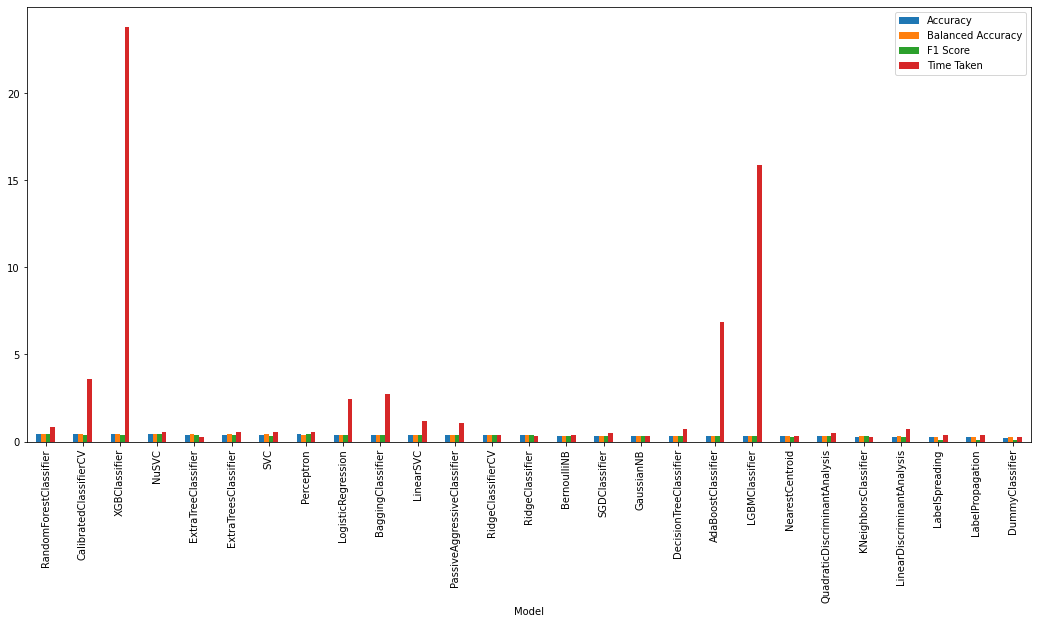

In [107]:
models_c.plot.bar(figsize = (18,8));

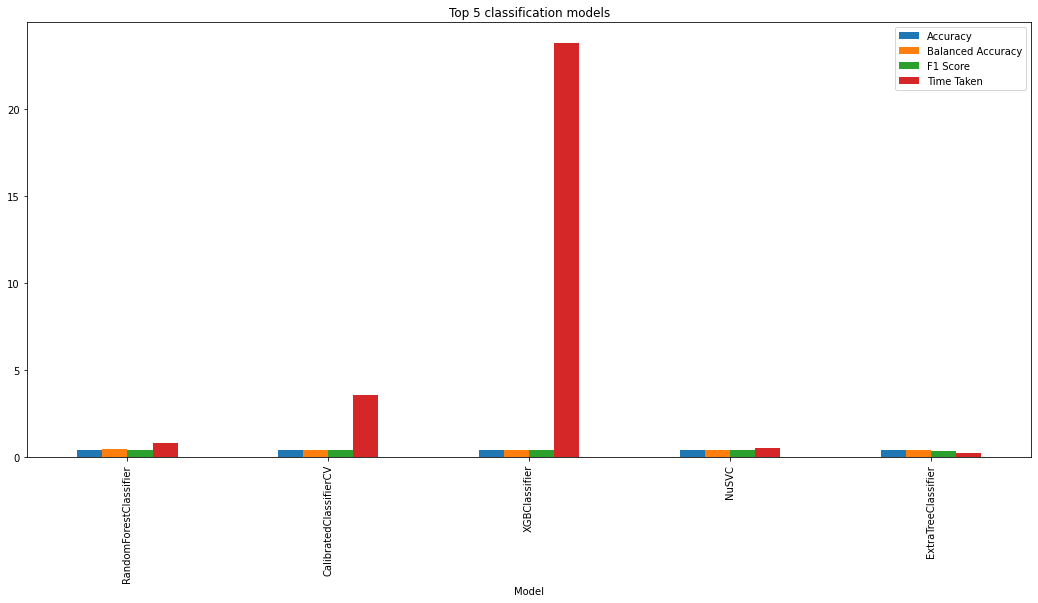

In [108]:
models_c.iloc[0:5].plot.bar(figsize = (18,8), title="Top 5 classification models");

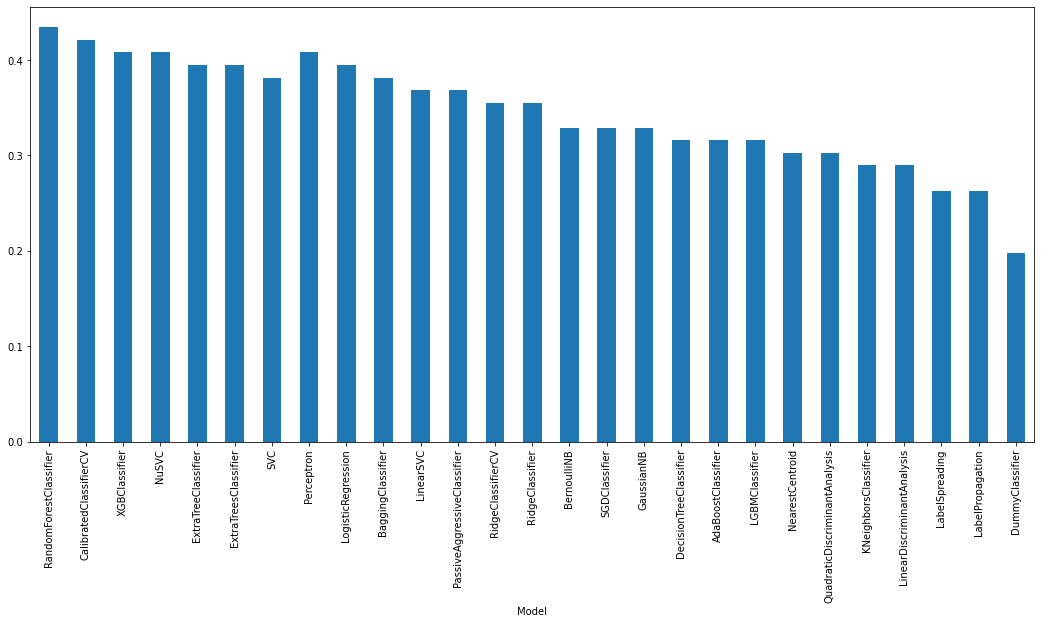

In [109]:
models_c['Accuracy'].plot.bar(figsize = (18,8));

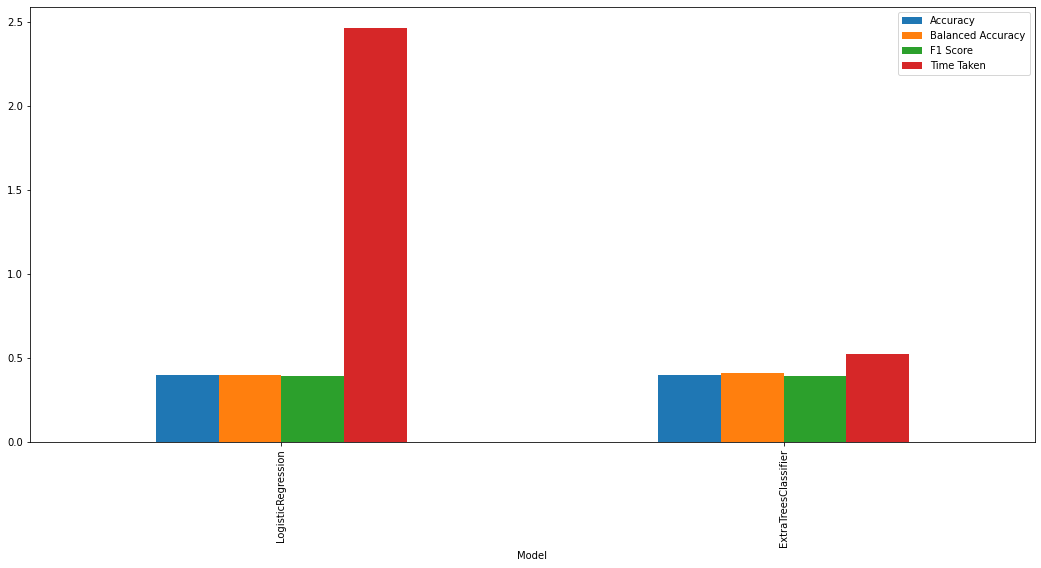

In [110]:
models_c.loc[['LogisticRegression','ExtraTreesClassifier']].plot.bar(figsize = (18,8));

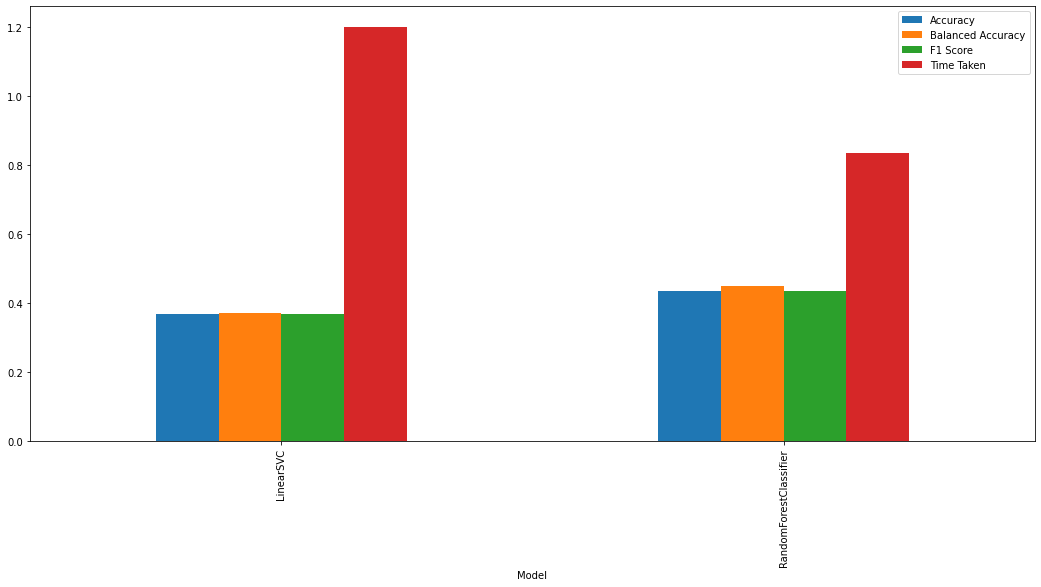

In [111]:
models_c.loc[['LinearSVC','RandomForestClassifier']].plot.bar(figsize = (18,8));

#Logistic Regression-Optimal Classification based on Lazy Predict
Used in Presentation

In [146]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [147]:
#load datasets
data = pd.read_table('https://raw.githubusercontent.com/mmb405/Machine-Learning/main/PTSD%20Dataset%20Condition%20Annotated%20Numbers.txt',sep='\t',header=[0]) 

In [148]:
template = 'ggplot2'
test_size = 0.4

In [149]:
#prepare data
features = data.iloc[1:, 0].values
data=data.drop(['GeneSymbols'], axis = 1) 
dataT = np.transpose(data)

#X is the data, y is the lables (classes)
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

classes = np.unique(y)
n_classes = len(classes)

class_label= dataT[0]

X = scale(X, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

In [150]:
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# there are several useful parameters such as:
# C - Regularization parameter. The strength of the regularization.
# kernel - Specifies the kernel type to be used in the algorithm
# we will use a linear kernel, it is the only kernel which allows us to use features selection
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

# after training we can predict labels for the test samples
predictions = model.predict(X_test)

c_matrix = confusion_matrix(y_test,predictions)
cr = classification_report(y_test,predictions, output_dict=True)
model_accuracy = accuracy_score(y_test, predictions)

In [151]:
model_accuracy

0.39473684210526316

Model Accuracy for test_size=0.7: 0.32575757575757575
Model Accuracy for test_size=0.6: 0.35398230088495575
Model Accuracy for test_size=0.5: 0.30851063829787234
Model Accuracy for test_size=0.4: 0.39473684210526316
Model Accuracy for test_size=0.3: 0.3684210526315789


## Classification Report
Classification Results

In [152]:
clsf_report = pd.DataFrame(cr).transpose()
clsf_report1 = clsf_report[0:n_classes]

fig = px.bar(clsf_report1, barmode='group', template=template)
fig.update_layout(width=700, height=700, template=template, title="Classification Report")
fig.show()

## PCA

In [153]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

dataT1 = dataT
dataT1 = dataT1.iloc[:,1:len(dataT1.columns)]
dataT1

scaled = StandardScaler() 
scaled.fit(dataT1) 
scaled_data = scaled.transform(dataT1) 

#Run Principal Component Analysis
n_components=4
pca = PCA(n_components) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

labels = {str(i): f'PC{i+1}: {pca.explained_variance_ratio_[i]*100:.2f}%' for i in range(n_components)}
template = 'ggplot2'

# x and y given as array_like objects
figPCA2D = px.scatter(xpca, x=0, y=1, color=y, 
                      labels=dataT1.index,
                      hover_name = dataT1.index,
                      title="2D PCA for Labels")
figPCA2D.update_layout(width=1000, height=800, template=template)
figPCA2D.show()

## Confusion Matrix

In [154]:
CM_df = pd.DataFrame(c_matrix, columns=classes, index=classes)

heat = go.Heatmap(z = CM_df, x=CM_df.index, 
                  y=CM_df.columns, 
                  showscale = False,
                  text=CM_df,
                  texttemplate="%{text}",
                  textfont={"size":10})
fig = go.Figure(heat)
fig.update_layout(width=700, height=700, template=template, title="Confusion Matrix")
fig.show()

## ROC Curve

In [155]:
##ROC Curve
# to make roc curve we should binarize our class labels to “one hot” vectors, so each class represent binary vector
# for example: first class = [1, 0, 0, 0], second = [0, 1, 0, 0], ...
y_test_bin_labels = label_binarize(y_test, classes=classes)

# for roc curve we are using predicted proba for our test samples
y_score = model.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_labels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

y_onehot = pd.get_dummies(y, columns=model.classes_)

#plot
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(y_score.shape[1]):
    y_true = y_onehot.iloc[:, i]
    name = f"{y_onehot.columns[i]}"
    fig.add_trace(go.Scatter(x=fpr[i], y=tpr[i], name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=700, height=500,
    template = template,
    title="ROC Curve"
)
fig.show()

## Feature Significance

In [156]:
# the weights obtained from svm.coef_ represent the vector coordinates
# which are orthogonal to the hyperplane and their direction indicates the predicted class.
# this is only available in the case of a linear kernel
top_features_count = 20

# we use median of weights from all classes, you can also use np.sum(np.abs(model.coef_, axis=0))
vector_weights = np.median(model.coef_, axis=0)
top_positive_coefficients = np.argsort(vector_weights)[-top_features_count:]
top_negative_coefficients = np.argsort(vector_weights)[:top_features_count]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
top_features, top_features_weights = features[top_coefficients], vector_weights[top_coefficients]

d = {'Features':features[top_coefficients], 'Weight':vector_weights[top_coefficients]}
df_features = pd.DataFrame(d)

#plot feature significance
fig = px.bar(y=df_features.Features, x=df_features.Weight, template=template)
fig.update_layout(width=700, height=1000, template=template, title="Feature Significance")
fig.show()